In [554]:
neg = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample, p=np.array([1,1,1,1])/4.0)
                for i in range(seq_len)]).transpose()
print([''.join(x) for x in neg[:1]])

['CATTTCCAAGCACTTATACGGTGAGTAGCTGCCGACGTGGCCTGCCGGCAGTGGCAAGAACGAGGTAAACGTCGCATCAGG']


In [455]:
import numpy as np

seq_len = 81 
num_sample = 500

benchmark_file = "/home/nkureev/PromoterSigma70Set.txt"
#benchmark_file = "/home/nkureev/TerminatorSet.txt"
pos_data = []
neg_data = []
line_type = ''
pos_count, neg_count = 0, 0
with open(benchmark_file, 'r') as f:
    n = 0
    for lines in f:
        n += 1
        if not lines.startswith('#'):
            #if 'rho-independent' not in lines:
            line = lines.split('\t')[5].upper()
            if 'Weak\n' in lines:
                if pos_count < num_sample:
                    pos_data.append(list(line))
                    pos_count += 1
                if neg_count < num_sample:
                    neg_data.append(list(line))
                    neg_count += 1
            
pos = np.array(pos_data)
neg = np.array(neg)

In [960]:
def fastaParser(infile):
    seqs = []
    headers = []
    with open(infile, 'r') as f:
        sequence = ""
        header = None
        for line in f:
            if line.startswith('>'):
                headers.append(line[1:-1])
                if header:
                    seqs.append(sequence)
                sequence = ""
                header = line[1:]
            else:
                sequence += line.rstrip()
        seqs.append(sequence)
    return headers, seqs


benchmark_pos = "/home/nkureev/cov_out.fasta"
benchmark_neg = "/home/nkureev/div_out.fasta"
h_pos, s_pos = fastaParser(benchmark_pos)
h_neg, s_neg = fastaParser(benchmark_neg)
pos_data, neg = [], []
for s in s_pos:
    pos_data.append(list(s))

for s in s_neg:
    neg.append(list(s))
    

In [943]:
import numpy as np

seq_len = 81 
num_sample = 500

# benchmark_file = "/home/nkureev/PromoterSigma70Set.txt"
# benchmark_file = "/home/nkureev/TerminatorSet.txt"

pos_data = []
pos_count = 0
with open(benchmark_file, 'r') as f:
    for lines in f:    
        if pos_count < num_sample:
            if not lines.startswith('#'):
                line = lines.split('\t')[5].upper()
#                 if lines.split('\t')[7] == 'Strong\n' and  lines.split('\t')[4] == 'Sigma70':
                if '[RE||RNA-seq evidence]' in lines:
                    if line != '':
                        pos_data.append(list(line))
                        pos_count += 1
                            
print(pos_count)

30


In [961]:
pos = np.array(pos_data)
neg = np.array(neg)

In [962]:
# print(''.join(pos[0]))
# pos_data[0]
# print(pos.shape)
pos

array([['T', 'T', 'A', ..., 'T', 'T', 'A'],
       ['C', 'T', 'G', ..., 'C', 'C', 'C'],
       ['A', 'T', 'A', ..., 'A', 'G', 'C'],
       ...,
       ['T', 'T', 'A', ..., 'C', 'C', 'G'],
       ['G', 'T', 'A', ..., 'C', 'A', 'A'],
       ['C', 'T', 'G', ..., 'T', 'T', 'C']], dtype='<U1')

In [963]:
pos_tensor = np.zeros(list(pos.shape) + [4])
neg_tensor = np.zeros(list(neg.shape) + [4])
pos_tensor

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

In [964]:
base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for row in range(num_sample):
    for col in range(seq_len):
        pass
#         pos_tensor[row,col,base_dict[pos[row,col]]] = 1
#         neg_tensor[row,col,base_dict[neg[row,col]]] = 1
print(pos_tensor.shape)
print('Positive sample matrix shape: {}'.format(pos.shape))
print('Positive sample tensor shape: {}'.format(pos_tensor.shape))

(100, 81, 4)
Positive sample matrix shape: (100, 81)
Positive sample tensor shape: (100, 81, 4)


In [965]:
X = np.vstack((pos_tensor, neg_tensor))
y = np.concatenate((np.ones(num_sample), np.zeros(num_sample)))

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

Training set shape: (200, 81, 4)
Training set label shape: (1000,)

One-hot encoding looks like:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Shape of the output of first layer: (32, 40, 1)


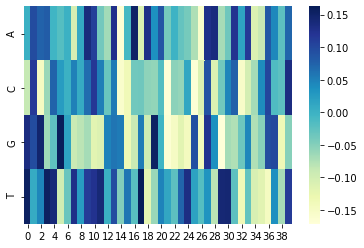

In [970]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import backend as K
import keras
import seaborn as sns
import pandas as pd
import os

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()
# model.add(Conv1D(200, 21, padding='same', input_shape=(seq_len, 4), activation='relu'))
model.add(Conv1D(1, 40, padding='same', input_shape=(seq_len, 4), activation='relu'))
model.add(MaxPooling1D())
# model.add(BatchNormalization())

weights_dict = {}
for i, v in enumerate(model.get_weights()[0]):
    weights_dict[i] = [float(i) for i in v]
weights_df_before = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df_before, cmap="YlGnBu", yticklabels=['A','C','G','T'])

model_weights = []
model_weights.append(model.get_weights()[0])

print('Shape of the output of first layer: {}'.format(model.predict_on_batch(pos_tensor[0:32,:,:]).shape))

In [971]:
model.add(Dropout(0.7))
model.add(Flatten())
# model.add(Dense(128, input_shape=(200,), activation='relu'))
# model.add(Dense(1, input_shape=(128,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.01)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

hist = model.fit(X, y, validation_split=0.2, epochs=1)
model_weights.append(model.get_weights()[0])
dependencies = {'f1': f1}
model.save('./partly_trained.h5')
losses = [hist.history['loss']]
for i in range(5):
    model = load_model('./partly_trained.h5', custom_objects=dependencies)
    hist = model.fit(X, y, validation_split=0.2, epochs=1)
    losses.append(hist.history['loss'])
    model_weights.append(model.get_weights()[0])
    model.save('./partly_trained.h5')

5/5 [==============================] - 0s 86ms/step - loss: 0.5686 - accuracy: 1.0000 - f1: 1.0000 - val_loss: 0.5561 - val_accuracy: 1.0000 - val_f1: 1.0000


In [972]:
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
num2seq = ['A','C','G','T']

''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])

'TCGTTGGTTATTGAGTATAGATATTGTAATTAAACCCGAC'

<AxesSubplot:>

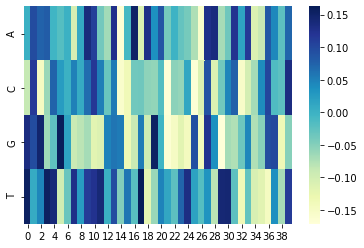

In [973]:
weights_dict = {}
for i, v in enumerate(model.get_weights()[0]):
    weights_dict[i] = [float(i) for i in v]
weights_df_after = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df_after, cmap="YlGnBu", yticklabels=['A','C','G','T'])

In [161]:
model_weights = model.get_weights()[0]

<ipython-input-150-f572a585fe30>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 7')

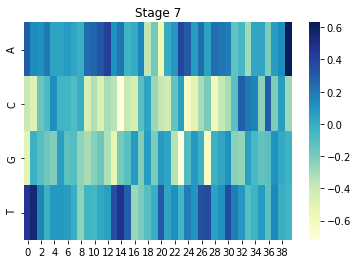

In [150]:
import matplotlib.pyplot as plt

weights_dict = {}
for i, v in enumerate(model_weights[70]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 7')

In [160]:
file = '/home/nkureev/NC_000913.fna'

genome_line = ''
with open(file, 'r') as f:
    for lines in f:
        if not lines.startswith('>'):
            genome_line += lines[0:-1]
            
print(len(genome_line))

4641652


In [177]:
genome = np.array(list(genome_line))
genome_tensor = np.zeros(list(genome.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for col in range(len(genome_line)):
    genome_tensor[col,base_dict[genome[col]]] = 1

In [178]:
genome_tensor

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [207]:
proba_list = []
for i in range(1000):
    test_tensor = genome_tensor[i:i+40]
    matches = []
    for j in test_tensor:
        n = 0
        if j[n] == 1:
            matches.append(n)
        else:
            n += 1
    proba = 0
    for v, g in zip(model_weights, matches):
        proba += v[g]
    proba_list.append(proba)

In [202]:
proba_list

[array([0.9845799], dtype=float32),
 array([0.90295994], dtype=float32),
 array([0.90295994], dtype=float32),
 array([0.90295994], dtype=float32),
 array([0.9845799], dtype=float32),
 array([0.9845799], dtype=float32),
 array([0.9845799], dtype=float32),
 array([1.1072812], dtype=float32),
 array([1.4126749], dtype=float32),
 array([1.4126749], dtype=float32),
 array([1.6507344], dtype=float32),
 array([2.094236], dtype=float32),
 array([2.5207832], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32),
 array([2.6962724], dtype=float32)]

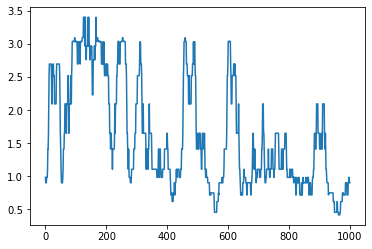

In [208]:
plt.plot(proba_list)
plt.show()

In [835]:
def manacher(s, l, r):
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1
        r += 1
    l += 1
    r -= 1
    return (r - l + 1, l, r)


def palindrome(string):
    longest = 0
    left = 0
    right = -1
    for i in range(len(string)):
        length, l, r = manacher(string, i, i + 1)
        if length > longest:
            left = l
            right = r
    return string[left: right + 1]

In [838]:
line = 'ATGCTTCGTA'
palindrome(line)
manacher(line, )

'ATGCTTCGTA'

In [909]:
def manacher(s, l, r):
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1
        r += 1
    l += 1
    r -= 1
    return (r - l + 1, l, r)


def palindrome(string, k):
    # k - количество нуклеотидов между плечами палиндрома 
    core_len = k + 1
    longest = 0
    left = 0
    right = -1
    for i in range(len(string)):
        sub_string = string[0 : i + 1] + string[i + core_len : len(string)]
        length, l, r = manacher(sub_string, i, i + 1)
        if length > longest:
            left = l
            right = r + core_len
            longest = length
    return (string[left: right], longest, left, right)

In [916]:
line = 'GATGCTCGTATGGAGGTTCCTTGGA'
palindrome(line, 0)
# string = line
# core_len = 2
# for i in range(len(string)):
#     sub_string = string[0 : i + 1] + string[i + core_len : len(string)]
#     length, l, r = manacher(sub_string, i, i + 1)
#     print(sub_string)
#     print(i - 1, i)
#     print(length, l, r)

('AGGTTCCTTGGA', 12, 13, 25)

In [915]:
line = 'ATGCCGTA'
manacher(line, 3, 4)

(0, 4, 3)

In [793]:
def longestPalindrome(s):
        # Transform S into T.
        # For example, S = "abba", T = "^#a#b#b#a#$".
        # ^ and $ signs are sentinels appended to each end to avoid bounds checking
        T = '#'.join('^{}$'.format(s))
        n = len(T)
        P = [0] * n
        C = R = 0
        for i in range (1, n-1):
            P[i] = (R > i) and min(R - i, P[2*C - i]) # equals to i' = C - (i-C)
            # Attempt to expand palindrome centered at i
            while T[i + 1 + P[i]] == T[i - 1 - P[i]]:
                P[i] += 1
    
            # If palindrome centered at i expand past R,
            # adjust center based on expanded palindrome.
            if i + P[i] > R:
                C, R = i, i + P[i]
    
        # Find the maximum element in P.
        maxLen, centerIndex = max((n, i) for i, n in enumerate(P))
        return s[(centerIndex  - maxLen)//2: (centerIndex  + maxLen)//2]

In [801]:
line = 'ATGCRGTA'
longestPalindrome(line)

'A'